In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split

In [3]:
# Dates have to extracted
data = pd.read_csv('./dataset/train.csv', parse_dates=['Dates'])

In [4]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id
0,2013-06-28 17:40:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,MISSION,NONE,2100 Block of MISSION ST,-122.419331,37.762264,141546
1,2004-02-19 02:46:00,LIQUOR LAWS,CONSUMING ALCOHOL IN PUBLIC VIEW,Thursday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,794152
2,2007-11-14 00:01:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,531205
3,2007-12-27 18:30:00,ROBBERY,ROBBERY OF A CHAIN STORE WITH A GUN,Thursday,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2400 Block of SAN BRUNO AV,-122.404715,37.730161,523137
4,2012-09-09 17:02:00,OTHER OFFENSES,PROBATION VIOLATION,Sunday,SOUTHERN,"ARREST, BOOKED",4TH ST / STEVENSON ST,-122.405239,37.785265,200968


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867873 entries, 0 to 867872
Data columns (total 10 columns):
Dates         867873 non-null datetime64[ns]
Category      867873 non-null object
Descript      867873 non-null object
DayOfWeek     867873 non-null object
PdDistrict    867873 non-null object
Resolution    867873 non-null object
Address       867873 non-null object
X             867873 non-null float64
Y             867873 non-null float64
Id            867873 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 66.2+ MB


In [6]:
# No null values in the data-frame
data.isnull().values.any()

False

In [7]:
# Random seed has been set - As per the guidlines of the competition
train, validate = train_test_split(data, test_size=0.2, random_state=3, shuffle=True)

In [8]:
# Dates

data['Hour'] = data.Dates.dt.hour
data['Minutes'] = data.Dates.dt.minute
data['Year'] = data.Dates.dt.year
data['Month'] = data.Dates.dt.month
data['Day'] = data.Dates.dt.day
data['DayOfWeekNum'] = pd.Categorical(pd.Series(data.DayOfWeek)).codes

In [9]:
# Address
def street_from_address(address):
    street = address.split()
    return (' '.join(street[-2:]))

data['Street_name'] = data['Address'].apply(lambda a:street_from_address(a))

In [10]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id,Hour,Minutes,Year,Month,Day,DayOfWeekNum,Street_name
0,2013-06-28 17:40:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,MISSION,NONE,2100 Block of MISSION ST,-122.419331,37.762264,141546,17,40,2013,6,28,0,MISSION ST
1,2004-02-19 02:46:00,LIQUOR LAWS,CONSUMING ALCOHOL IN PUBLIC VIEW,Thursday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,794152,2,46,2004,2,19,4,MARKET ST
2,2007-11-14 00:01:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,531205,0,1,2007,11,14,6,BRYANT ST
3,2007-12-27 18:30:00,ROBBERY,ROBBERY OF A CHAIN STORE WITH A GUN,Thursday,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2400 Block of SAN BRUNO AV,-122.404715,37.730161,523137,18,30,2007,12,27,4,BRUNO AV
4,2012-09-09 17:02:00,OTHER OFFENSES,PROBATION VIOLATION,Sunday,SOUTHERN,"ARREST, BOOKED",4TH ST / STEVENSON ST,-122.405239,37.785265,200968,17,2,2012,9,9,3,STEVENSON ST


In [11]:
train_cpy=train.copy()

In [12]:
train_cpy.plot(kind="scatter", x="X", y="Y")

In [46]:
def delete_outlier(a):
    return (a - 80.0) > 5.0

In [50]:
train_cpy['check'] = train_cpy['Y'].apply(lambda a:delete_outlier(a))
outliers = train_cpy[train_cpy.check == True]

In [59]:
train_cpy.drop(list(outliers.index),inplace=True)

In [60]:
train_cpy[train_cpy.check == True]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id,check


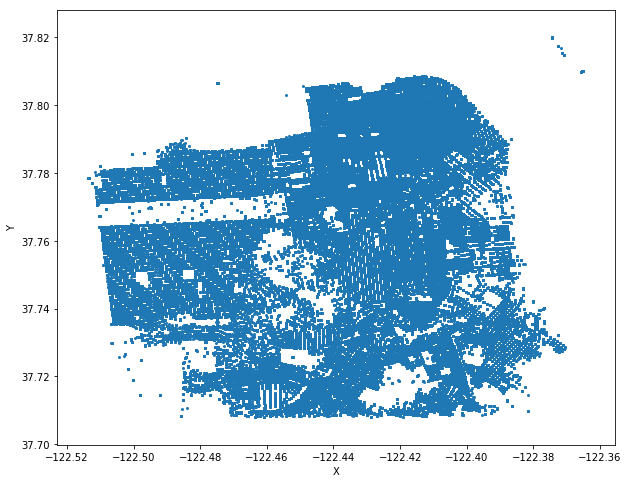

In [81]:
train_cpy.plot(kind="scatter", x="X", y="Y",figsize=(10,8),s=4.0)

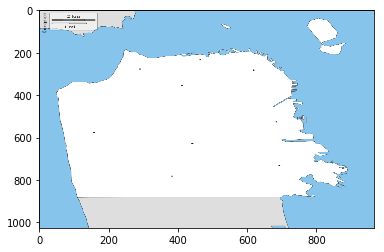

In [119]:
sf_img = img.imread('sf.png') #importing map
plt.imshow(sf_img,aspect='auto')

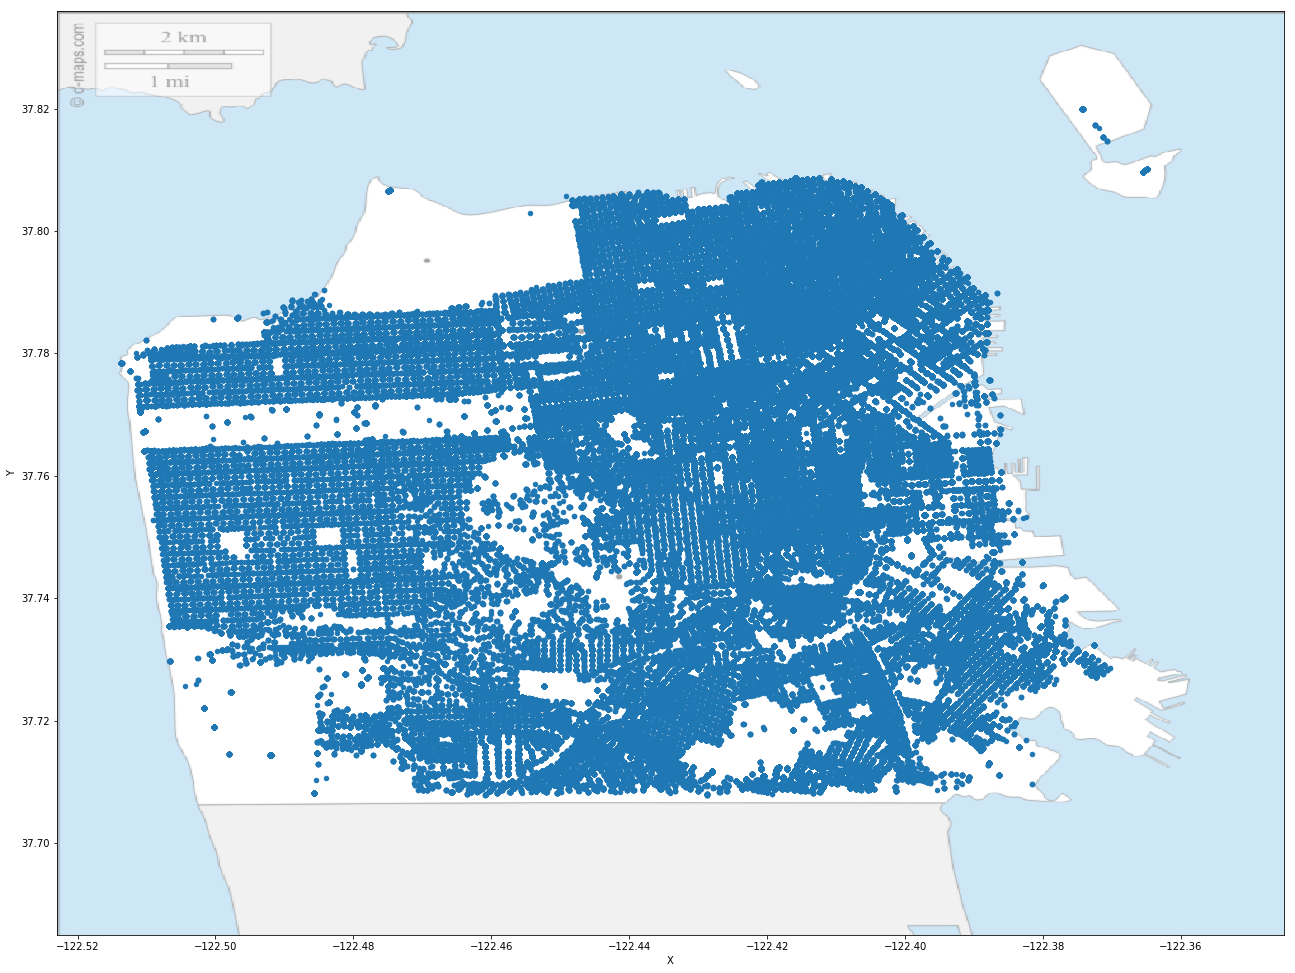

In [137]:
train_cpy.plot(kind='scatter', x='X', y='Y',figsize=(22,17))
plt.imshow(sf_img,extent=[-122.523, -122.345, 37.685, 37.836], alpha=0.4,aspect='auto')
plt.show()

# TODO
1. Drop the redundant columns
2. Perform Exploratory Data Analysis, Visualization
3. Finalize the feature list
4. Build the models
5. Voila!